#### Task A
Create a Data Audit for the Pima Indians Diabetes Database. The audit should cover:


    1. Data Overview & Structure:
			- Provide a summary of the dataset.
			- Identify the number of rows and columns.
			- List all variables names and their data types.
			- Classify each variable as categorical or numerical.	

In [3]:
import pandas as pd

# Lade das Dataset
df = pd.read_csv("../data/diabetes.csv")

# Zeige die ersten Zeilen des Datensatzes
print("Ersten 5 Zeilen des Datensatzes:")
print(df.head(5), "\n")

# Zusammenfassung des Datensatzes
print("Statistische Zusammenfassung des Datensatzes:")
print(df.describe(), "\n")

# Anzahl der Zeilen und Spalten
print("Anzahl der Zeilen und Spalten:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

# Variablennamen und deren Datentypen
print("Variablennamen und Datentypen:")
print(df.dtypes, "\n")

# Klassifikation der Variablen in kategorisch oder numerisch
#Gefixt aber nicht dynamisch!!!!!!!!!!!!!
categorical_vars = "Outcome"
numerical_vars = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_vars.remove("Outcome")

print("Kategorische Variablen:", categorical_vars if categorical_vars else "Keine kategorischen Variablen")
print("Numerische Variablen:", numerical_vars)

Ersten 5 Zeilen des Datensatzes:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

Statistische Zusammenfassung des Datensatzes:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.7994

    2. Summary Statistics:
			- Compute key statistics such as mean, median, minimum, maximum, and standard deviation.
			- Create a histogram for each variable.
   			- Identify any unusual values that stand out and possible skew of the data.

Schlüsselstatistiken für numerische Variablen:
                                mean    median     min     max         std
Pregnancies                 3.845052    3.0000   0.000   17.00    3.369578
Glucose                   120.894531  117.0000   0.000  199.00   31.972618
BloodPressure              69.105469   72.0000   0.000  122.00   19.355807
SkinThickness              20.536458   23.0000   0.000   99.00   15.952218
Insulin                    79.799479   30.5000   0.000  846.00  115.244002
BMI                        31.992578   32.0000   0.000   67.10    7.884160
DiabetesPedigreeFunction    0.471876    0.3725   0.078    2.42    0.331329
Age                        33.240885   29.0000  21.000   81.00   11.760232
Outcome                     0.348958    0.0000   0.000    1.00    0.476951 



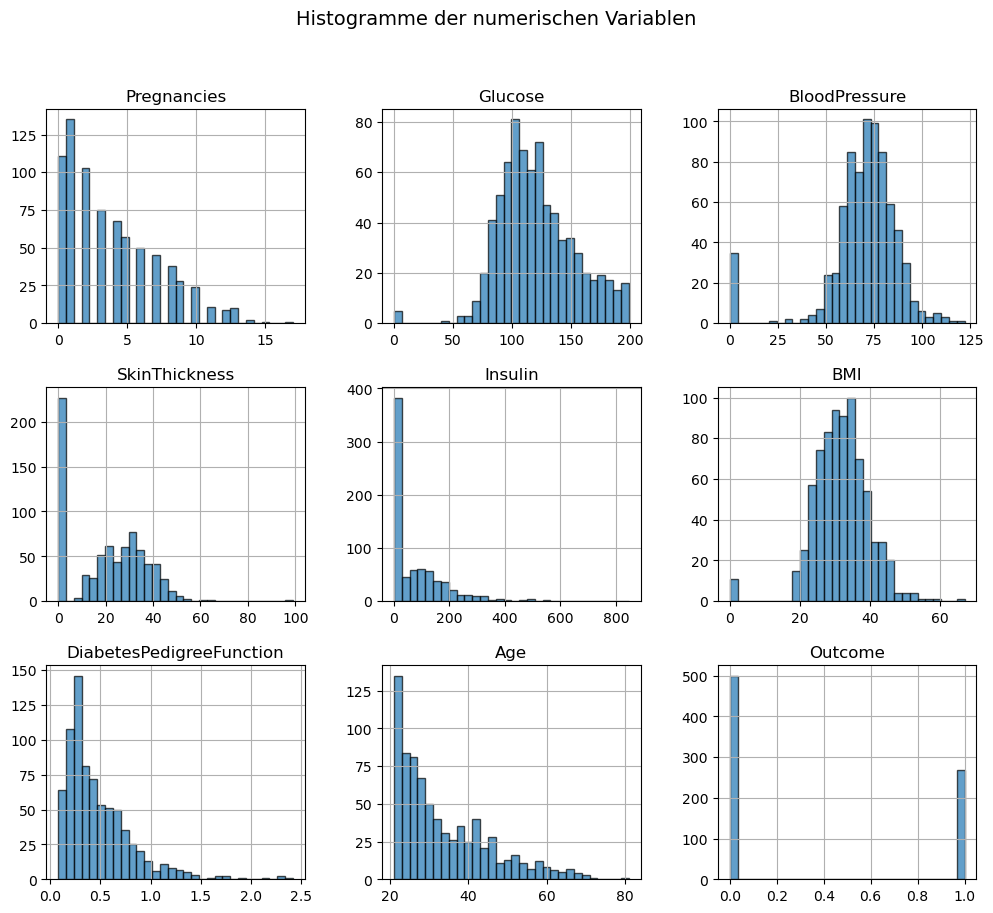

Skewness der Daten:
Rechtssteile (positive Skewness) - Linkssteile (negative Skewness)
Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

Anzahl der potenziellen Ausreißer (Werte > 3*std vom Mittelwert):
Pregnancies                  4
Glucose                      5
BloodPressure               35
SkinThickness                1
Insulin                     18
BMI                         14
DiabetesPedigreeFunction    11
Age                          5
Outcome                      0
dtype: int64


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Berechnung der Schlüsselstatistiken für numerische Variablen
summary_stats = df.describe().T
summary_stats["median"] = df.median()
summary_stats = summary_stats[["mean", "median", "min", "max", "std"]]

print("Schlüsselstatistiken für numerische Variablen:")
print(summary_stats, "\n")

# Erstelle Histogramme für jede numerische Variable
df.hist(figsize=(12, 10), bins=30, edgecolor='black', alpha=0.7)
plt.suptitle("Histogramme der numerischen Variablen", fontsize=14)
plt.show()

# Identifiziere mögliche ungewöhnliche Werte und Skewness
skewness = df.skew()
print("Skewness der Daten:")
print("Rechtssteile (positive Skewness) - Linkssteile (negative Skewness)")
print(skewness)

# Identifizierung potenzieller Ausreißer basierend auf 3 Standardabweichungen
outliers = df[(np.abs(df - df.mean()) > 3 * df.std())].count()
print("\nAnzahl der potenziellen Ausreißer (Werte > 3*std vom Mittelwert):")
print(outliers)


    3. Outlier:
			- Decide on a formal method to detect univariate outliers.
			- Report the number of outliers per variable.
			- Create scatterplots for each combination of variables.
			- Can you identify possible multivariate outliers that you did not detect as univariate outliers?

Anzahl der univariaten Ausreißer pro Variable (Tukeys Fence):
{'Pregnancies': 4, 'Glucose': 5, 'BloodPressure': 45, 'SkinThickness': 1, 'Insulin': 34, 'BMI': 19, 'DiabetesPedigreeFunction': 29, 'Age': 9, 'Outcome': 0} 



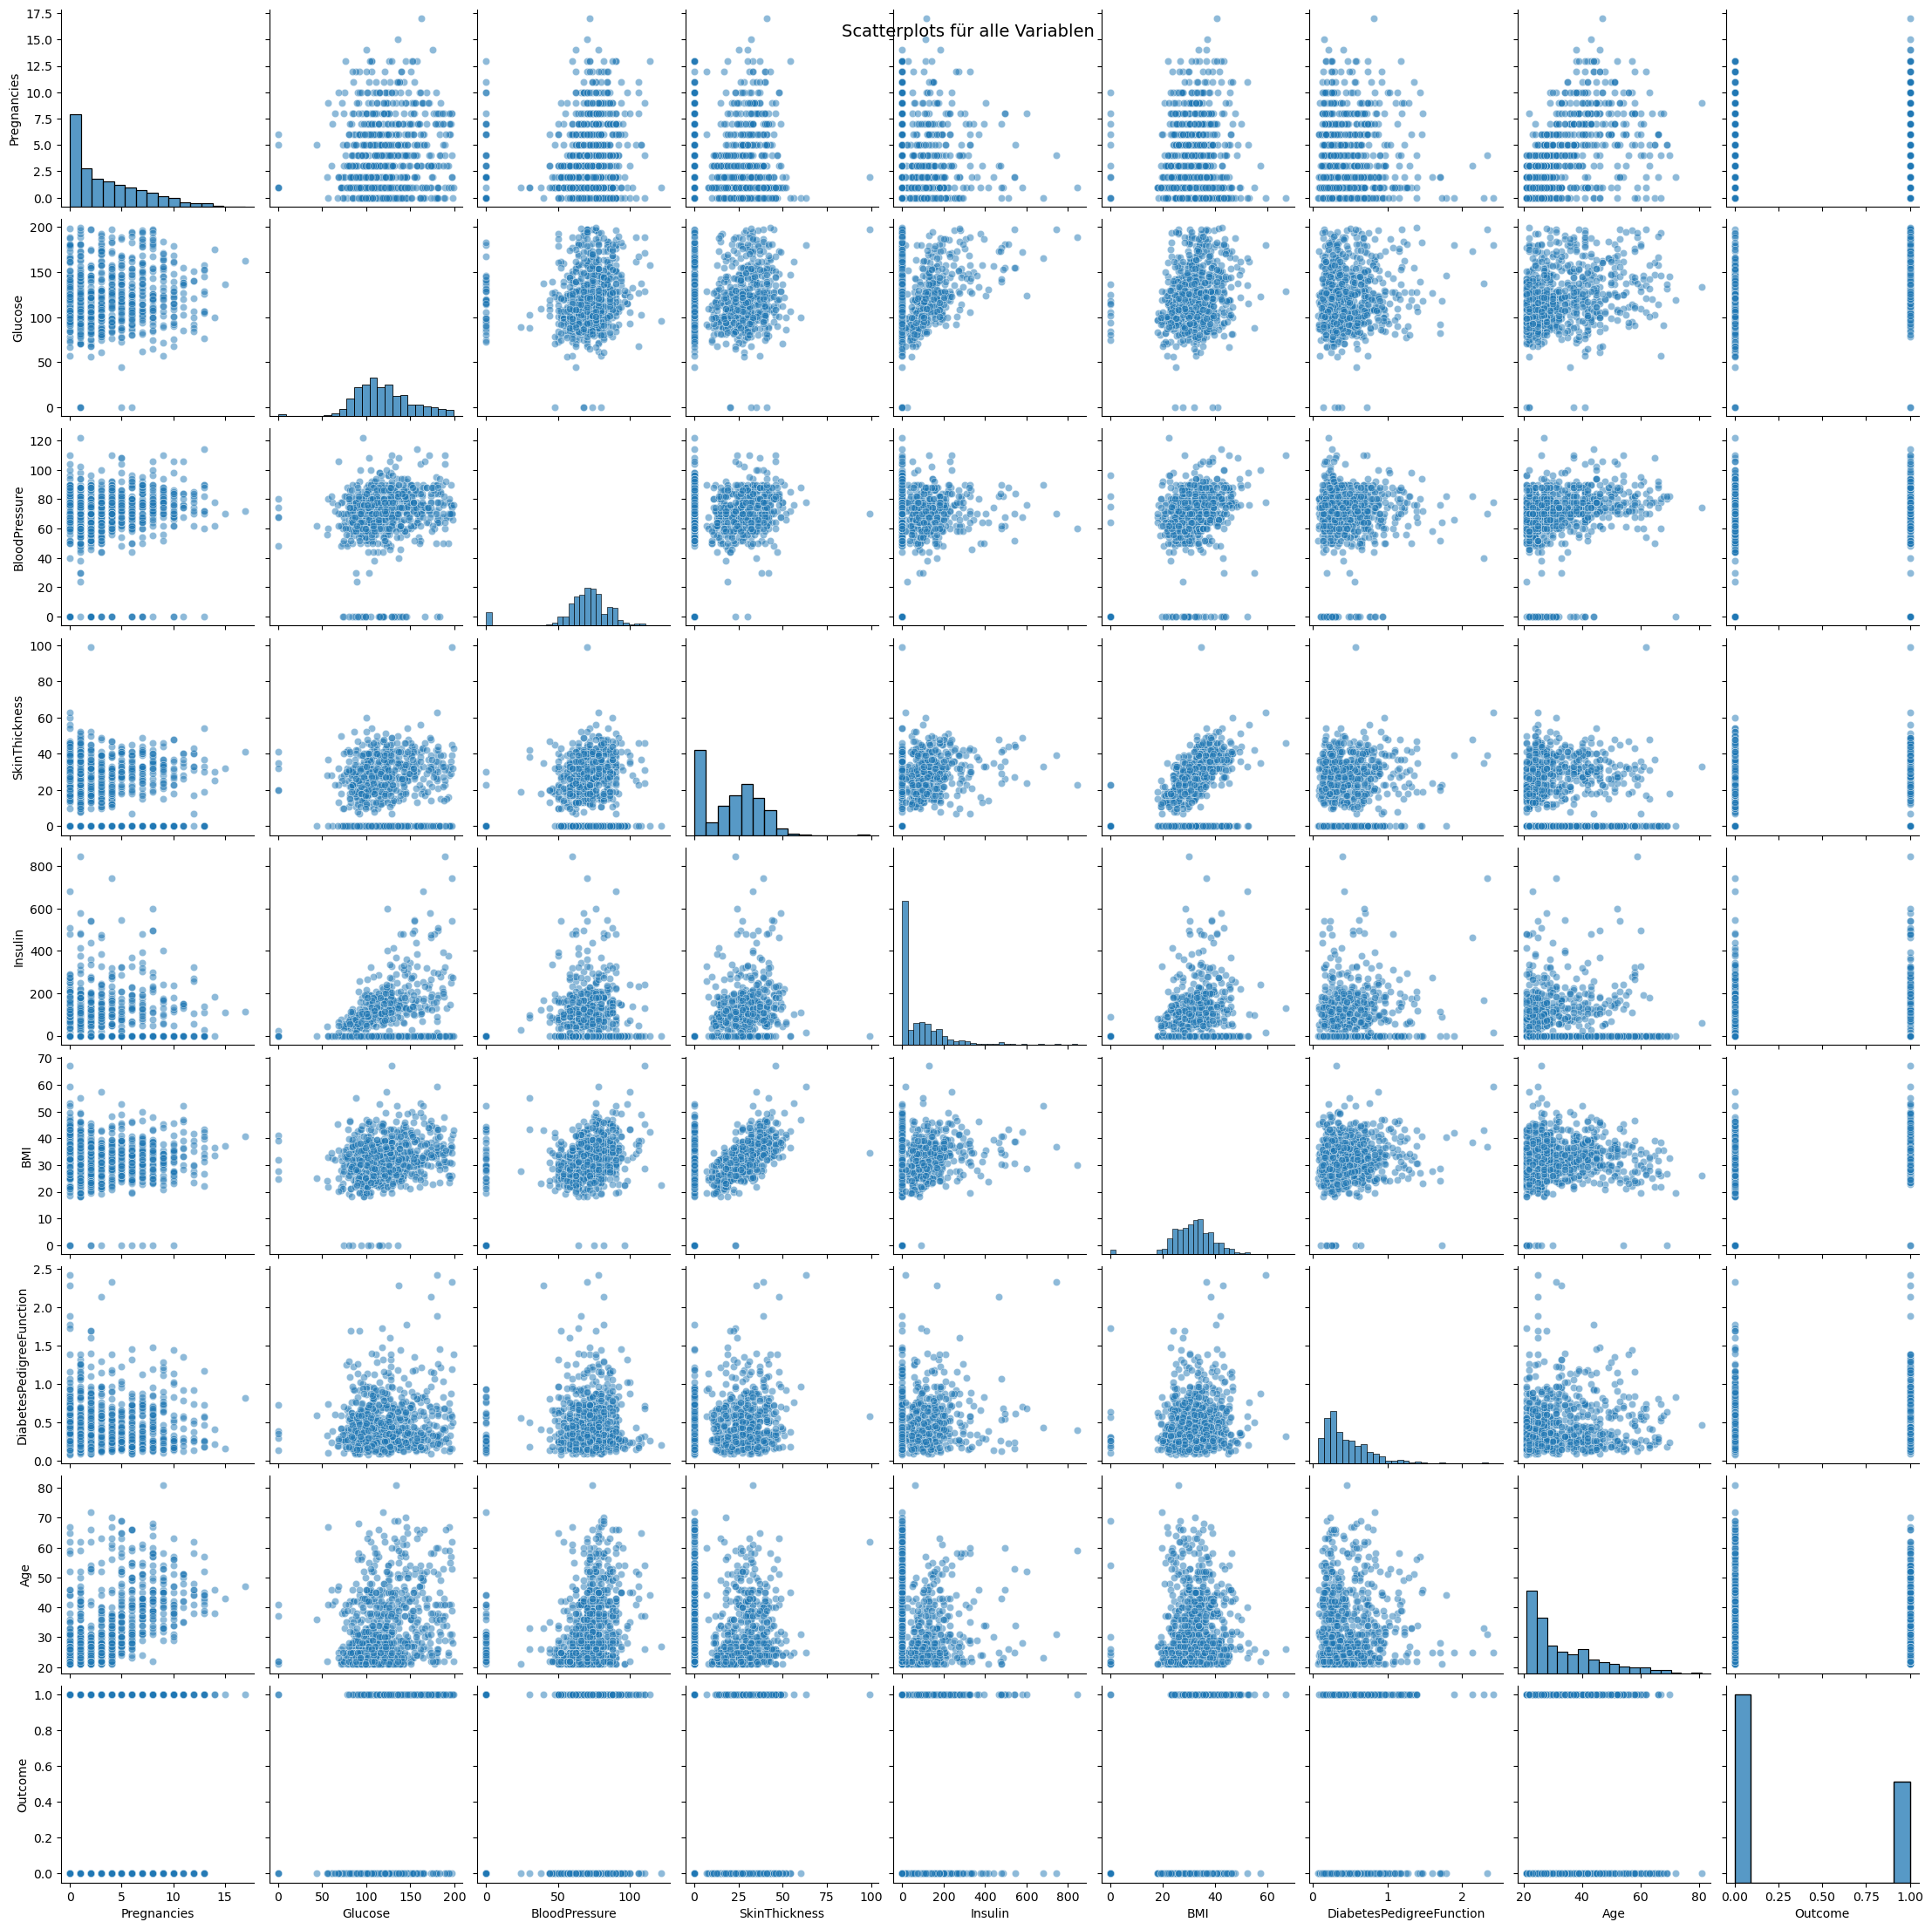


Anzahl der multivariaten Ausreißer: 20


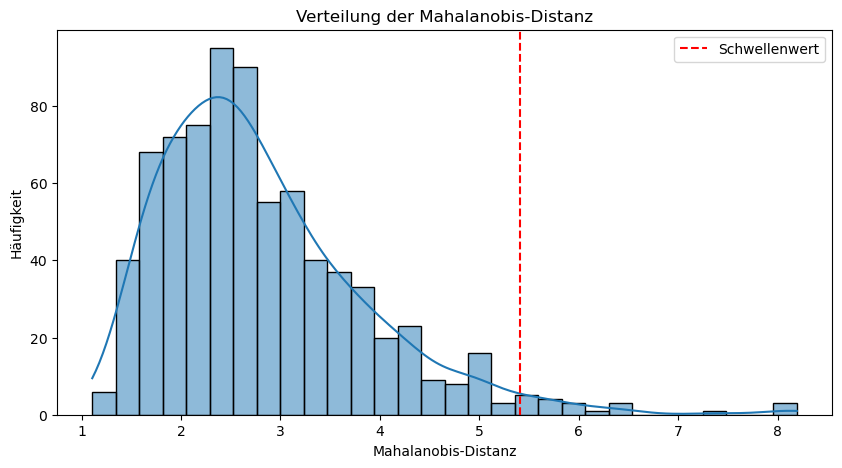

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Methode zur Erkennung von univariaten Ausreißern: Tukey's Fence (IQR-Methode)
outlier_counts = {}
df_outliers = df.copy()

for col in df.select_dtypes(include=["int64", "float64"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    outlier_counts[col] = outlier_mask.sum()
    df_outliers[col + "_outlier"] = outlier_mask

# Anzahl der Ausreißer pro Variable ausgeben
print("Anzahl der univariaten Ausreißer pro Variable (Tukeys Fence):")
print(outlier_counts, "\n")

# Scatterplots für jede Kombination von Variablen
sns.pairplot(df, diag_kind="hist", plot_kws={"alpha": 0.5})
plt.suptitle("Scatterplots für alle Variablen", fontsize=14)
plt.show()

# Multivariate Ausreißer mit Mahalanobis-Distanz erkennen
from scipy.spatial.distance import mahalanobis

def mahalanobis_distance(df, cov_inv):
    mean = df.mean().values
    return df.apply(lambda row: mahalanobis(row, mean, cov_inv), axis=1)

# Berechnung der Mahalanobis-Distanz für numerische Variablen
df_numeric = df.select_dtypes(include=["int64", "float64"])
cov_matrix = np.cov(df_numeric.T)
cov_matrix_inv = np.linalg.inv(cov_matrix)

df["Mahalanobis_Distance"] = mahalanobis_distance(df_numeric, cov_matrix_inv)

# Definiere einen Schwellenwert für multivariate Ausreißer (Chi-Quadrat-Verteilung)
threshold = np.percentile(df["Mahalanobis_Distance"], 97.5)
df["Multivariate_Outlier"] = df["Mahalanobis_Distance"] > threshold

# Anzahl der multivariaten Ausreißer ausgeben
print("\nAnzahl der multivariaten Ausreißer:", df["Multivariate_Outlier"].sum())

# Visualisierung der multivariaten Ausreißer
plt.figure(figsize=(10, 5))
sns.histplot(df["Mahalanobis_Distance"], bins=30, kde=True)
plt.axvline(threshold, color="red", linestyle="dashed", label="Schwellenwert")
plt.title("Verteilung der Mahalanobis-Distanz")
plt.xlabel("Mahalanobis-Distanz")
plt.ylabel("Häufigkeit")
plt.legend()
plt.show()


Die Mahalanobis-Distanz misst, wie weit ein Datenpunkt von der „zentralen Struktur“ eines Datensatzes entfernt ist, unter Berücksichtigung von Korrelationen zwischen Variablen.

- Sie zeigt, wie ungewöhnlich ein Punkt in einem mehrdimensionalen Raum ist.
- Höhere Werte bedeuten, dass der Punkt weiter von der Hauptverteilung entfernt liegt (möglicher Ausreißer).

Schwellenwert 97.5% -> rote Linie
Die oberen 2.5% werden als Ausreißer festgelegt


    4. Missing Values:,
        - Identify columns with missing values,
        - Discuss possible strategies to handle the missing data.

In [6]:
import pandas as pd

# Ersetze 0-Werte durch NaN für die Analyse fehlender Werte
df_missing = df.drop(columns=['Outcome', 'Pregnancies']).replace(0, pd.NA).assign(
    Outcome=df['Outcome'], Pregnancies=df['Pregnancies'])

# Identifiziere Spalten mit fehlenden Werten
missing_counts = df_missing.isna().sum()
missing_columns = missing_counts[missing_counts > 0]

# Zeige die Anzahl der fehlenden Werte pro Spalte
print("Anzahl der fehlenden Werte pro Spalte:")
print(missing_columns)

# Diskutiere mögliche Strategien zum Umgang mit fehlenden Werten:
strategies = {
    "Löschen der Zeilen": "Falls nur wenige fehlende Werte existieren, können betroffene Zeilen entfernt werden.",
    "Mittelwert-/Median-Imputation": "Numerische Werte können mit dem Mittelwert oder Median der Spalte ersetzt werden.",
    "Vorherige/Nächste Werte übernehmen (Forward Fill / Backward Fill)": "Bei Zeitreihendaten kann man vorherige oder nachfolgende Werte übernehmen.",
    "Hot-Deck-Imputation": "Fehlende Werte werden durch ähnliche vorhandene Werte ersetzt.",
    "Regression/ML-Modelle": "Vorhersage fehlender Werte anhand anderer Variablen durch Machine Learning."
}

print("\nStrategien zum Umgang mit fehlenden Werten:")
for strategy, description in strategies.items():
    print(f"- {strategy}: {description}")


Anzahl der fehlenden Werte pro Spalte:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Strategien zum Umgang mit fehlenden Werten:
- Löschen der Zeilen: Falls nur wenige fehlende Werte existieren, können betroffene Zeilen entfernt werden.
- Mittelwert-/Median-Imputation: Numerische Werte können mit dem Mittelwert oder Median der Spalte ersetzt werden.
- Vorherige/Nächste Werte übernehmen (Forward Fill / Backward Fill): Bei Zeitreihendaten kann man vorherige oder nachfolgende Werte übernehmen.
- Hot-Deck-Imputation: Fehlende Werte werden durch ähnliche vorhandene Werte ersetzt.
- Regression/ML-Modelle: Vorhersage fehlender Werte anhand anderer Variablen durch Machine Learning.


    5. Correlations.
			- Create a correlation matrix for the dataset.
			- Visualize the correlation matrix.

🔹 Korrelationsmatrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   
Mahalanobis_Distance         0.189492  0.306180      -0.159821      -0.025965   
Multivariate_Outlier         0.005096  0.052228      -0.120086       0.040655   

     

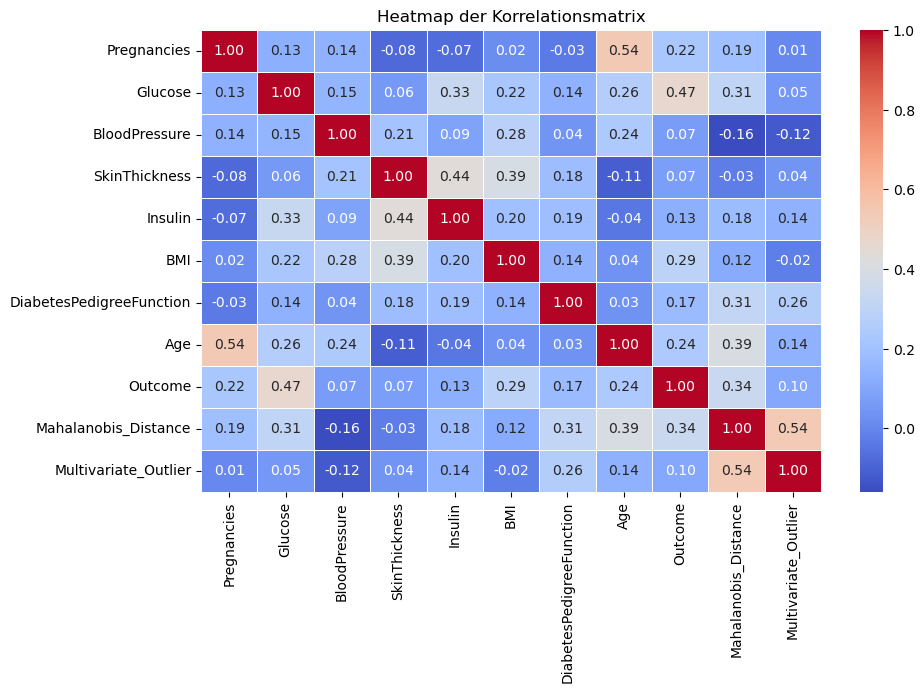

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Erstelle die Korrelationsmatrix
correlation_matrix = df.corr()

# Zeige die Korrelationsmatrix als Tabelle
print("🔹 Korrelationsmatrix:")
print(correlation_matrix)

# Visualisiere die Korrelationsmatrix als Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap der Korrelationsmatrix")
plt.show()

#### Task B
Based on your Data Audit, prepare your data for further analysis by handling outliers and missing data.


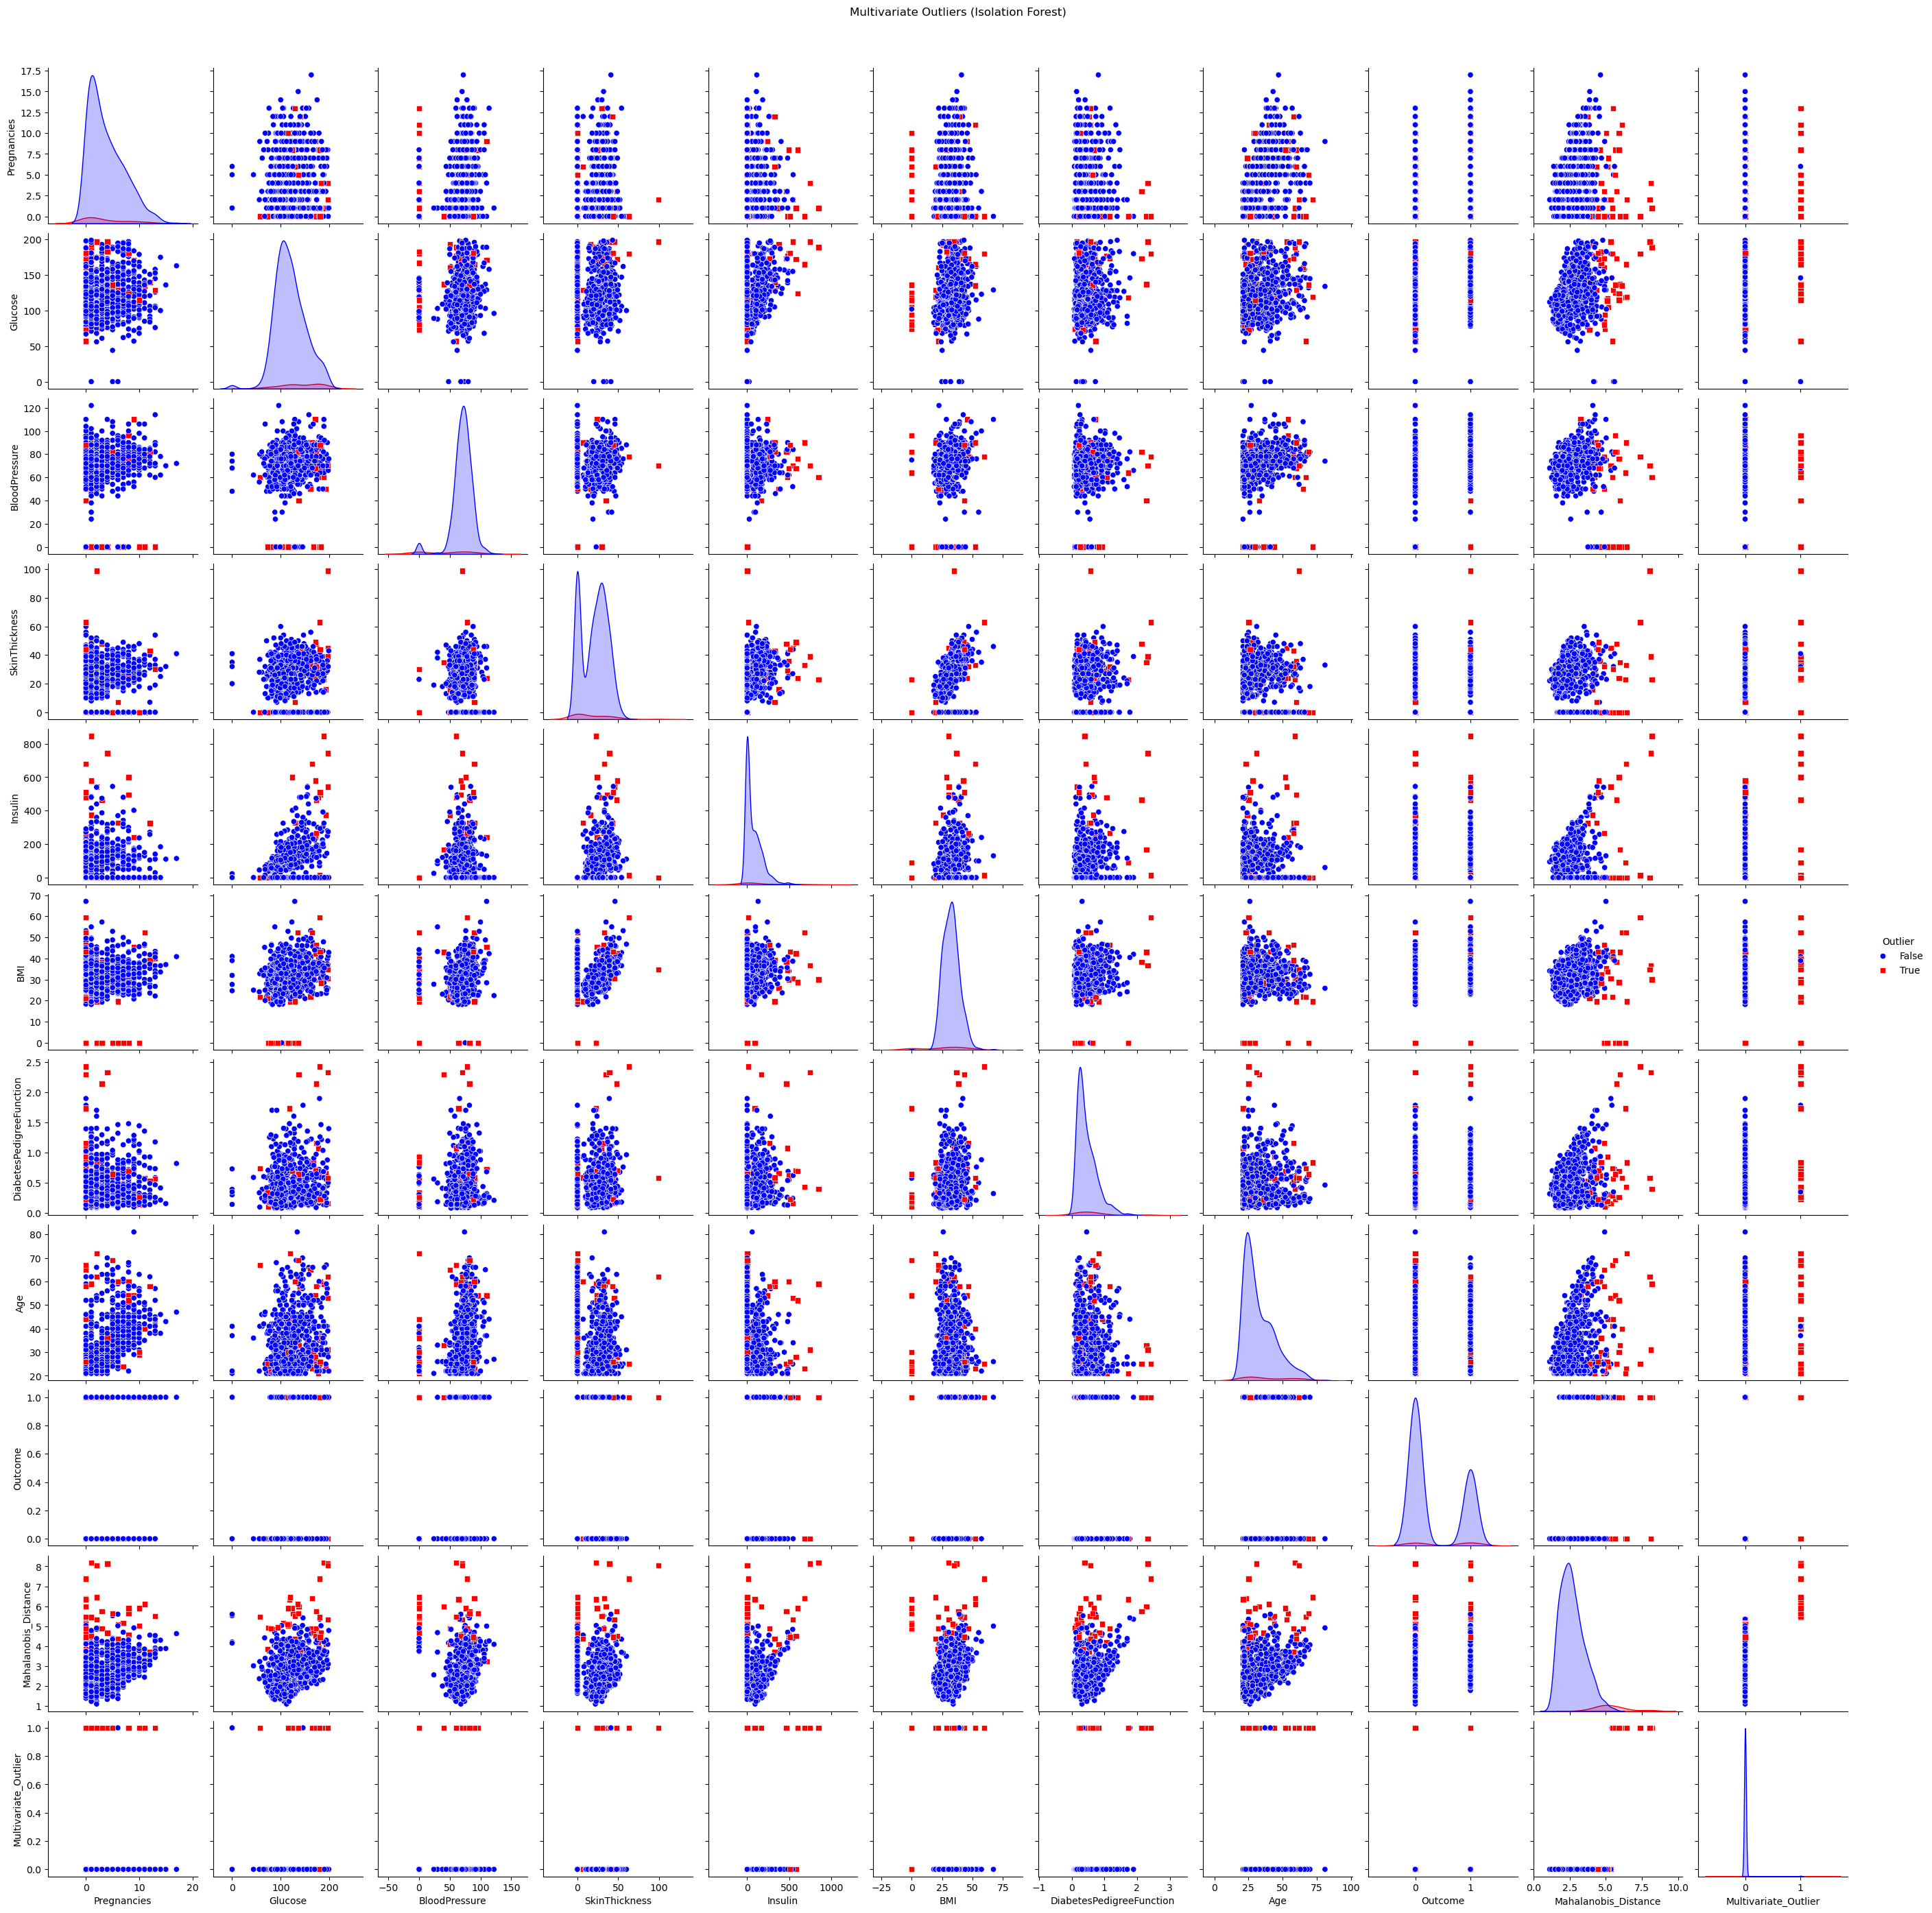

In [8]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Outlier'] = iso_forest.fit_predict(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]) == -1

# Visualize outliers using pairplot
sns.pairplot(df, hue='Outlier', palette={True: 'red', False: 'blue'}, markers=['o', 's'])
plt.suptitle('Multivariate Outliers (Isolation Forest)', y=1.02)
plt.show()


In [9]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # contamination is the expected proportion of outliers

# Fit the model and predict outliers
outlier_predictions = iso_forest.fit_predict(df.drop(columns=['Outcome']))

# Identify outliers (outliers are labeled as -1)
outlier_indices = df.index[outlier_predictions == -1].tolist()

# Count the number of outliers
outlier_count = len(outlier_indices)

print(f"Number of outliers detected: {outlier_count}")
print(f"Indices of outliers: {outlier_indices}")

# Save outlier indices to a list
outlier_indices_list = outlier_indices

# Delete outliers from the dataset
df_cleaned = df.drop(index=outlier_indices_list)

# Verify the cleaned dataset
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Number of outliers detected: 39
Indices of outliers: [4, 8, 9, 13, 43, 49, 58, 60, 81, 186, 193, 220, 228, 247, 258, 294, 300, 332, 336, 349, 357, 370, 371, 375, 409, 426, 445, 453, 487, 494, 502, 519, 522, 537, 579, 584, 684, 706, 753]
Original dataset shape: (768, 12)
Cleaned dataset shape: (729, 12)


In [14]:
# Columns where 0 represents missing values
columns_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Replace 0s with NaN for these columns
df_cleaned[columns_with_zeros] = df_cleaned[columns_with_zeros].replace(0, float('nan'))

# Display the number of missing values in each column
print(df[columns_with_zeros].isnull().sum())

from sklearn.impute import KNNImputer

# Initialize the KNNImputer (k-nearest neighbors imputation)
imputer = KNNImputer(n_neighbors=5)  # Use 5 nearest neighbors

# Perform hot deck imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Display the first few rows of the imputed dataset
print(df_imputed.head())

print(df_imputed[columns_with_zeros].isnull().sum())
print(df_imputed)
df_imputed.columns
df_imputed.drop(columns=['Mahalanobis_Distance', 'Multivariate_Outlier', 'Outlier'])
df_imputed.to_pickle("../data/df_imputed_clean.pkl")
df_imputed.to_csv("../data/df_imputed_clean.csv")
zero_mask = (df_imputed == 0)

# so df_imputed is the cleaned dataset? To use in TaskC?
# Display the boolean mask
print("\nBoolean Mask for Zero Values:")
print(zero_mask)
##countif geht nicht
#print(zero_mask.sum())  # Gibt die Anzahl der Nullwerte pro Spalte zurück
#print(zero_mask.sum().sum())  # Gesamtzahl aller Nullwerte


Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.0  33.6   
1          1.0     85.0           66.0           29.0     58.6  26.6   
2          8.0    183.0           64.0           25.8    164.6  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    116.0           74.0           20.6    102.8  25.6   

   DiabetesPedigreeFunction   Age  Outcome  Mahalanobis_Distance  \
0                     0.627  50.0      1.0              2.604033   
1                     0.351  31.0      0.0              1.899997   
2                     0.672  32.0      1.0              3.472098   
3                     0.167  21.0      0.0              1.672739   
4   

**Es fehlt das Handling der fehlenden Daten**
Raphael Fragen, ob damit behandelt

#### Task C
Test different methods to sample training and test data from the dataset. Compare the sampled datasets based on the descriptive methods you have learned and evaluate which sampling method worked best.

1. Basic Train–Test Split

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Example: 75% for training, 25% for testing
train_df, test_df = train_test_split(df_imputed, test_size=0.25, random_state=42)

# Check sizes
print("Train set size:", len(train_df))
print("Test set size:", len(test_df))

# Basic descriptive stats for comparison
print("\nTrain set descriptive stats:")
print(train_df.describe(include='all'))

print("\nTest set descriptive stats:")
print(test_df.describe(include='all'))



Train set size: 546
Test set size: 183

Train set descriptive stats:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   546.000000  546.000000     546.000000     546.000000  546.000000   
mean      3.782051  120.694505      72.222344      28.796337  141.582418   
std       3.276008   29.411942      12.183653       8.819669   78.602646   
min       0.000000   56.000000      24.000000       7.000000   16.000000   
25%       1.000000   99.000000      64.000000      23.000000   87.700000   
50%       3.000000  116.000000      72.000000      29.000000  130.000000   
75%       6.000000  139.750000      80.000000      34.550000  176.000000   
max      17.000000  199.000000     114.000000      56.000000  545.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  \
count  546.000000                546.000000  546.000000  546.000000   
mean    32.464286                  0.461418   32.661172    0.340659   
std      6.672039                

2. k-Fold Cross Validation 

    With k-fold cross validation, you split your data into k folds (e.g., 5). Each fold in turn becomes the test set while the remaining k-1 folds become the training set. For descriptive comparisons, you can look at each fold’s distribution:

In [12]:
from sklearn.model_selection import KFold
import pandas as pd

# Assuming df is already defined
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_descriptives = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(df_imputed), start=1):
    fold_train = df_imputed.iloc[train_index]
    fold_test  = df_imputed.iloc[test_index]
    
    print(f"\nFold {fold_idx}:")
    print(f"  - Training set size: {len(fold_train)}")
    print(f"  - Test set size: {len(fold_test)}")
    print(f"  - First 5 training indices: {train_index[:5]}")
    print(f"  - First 5 test indices: {test_index[:5]}")
    
    fold_descriptives.append({
        'Fold': fold_idx,
        'Train_Size': len(fold_train),
        'Test_Size': len(fold_test),
    })

# Summarize the fold-by-fold comparison
fold_df = pd.DataFrame(fold_descriptives)
print("\nSummary of k-Fold descriptive comparison:")
print(fold_df)

# Check sizes
print("\n\nTrain set size:", len(train_df))
print("Test set size:", len(test_df))

# Basic descriptive stats for comparison
print("\nTrain set descriptive stats:")
print(fold_train.describe(include='all'))

print("\nTest set descriptive stats:")
print(fold_test.describe(include='all'))



Fold 1:
  - Training set size: 583
  - Test set size: 146
  - First 5 training indices: [0 1 3 4 5]
  - First 5 test indices: [ 2 10 23 30 31]

Fold 2:
  - Training set size: 583
  - Test set size: 146
  - First 5 training indices: [0 1 2 3 4]
  - First 5 test indices: [ 6  7  9 11 15]

Fold 3:
  - Training set size: 583
  - Test set size: 146
  - First 5 training indices: [1 2 4 6 7]
  - First 5 test indices: [ 0  3  5 12 16]

Fold 4:
  - Training set size: 583
  - Test set size: 146
  - First 5 training indices: [0 1 2 3 4]
  - First 5 test indices: [ 8 36 37 50 53]

Fold 5:
  - Training set size: 584
  - Test set size: 145
  - First 5 training indices: [0 2 3 5 6]
  - First 5 test indices: [ 1  4 13 14 20]

Summary of k-Fold descriptive comparison:
   Fold  Train_Size  Test_Size
0     1         583        146
1     2         583        146
2     3         583        146
3     4         583        146
4     5         584        145


Train set size: 546
Test set size: 183

Train set

3. Bootstrapping

    Bootstrapping repeatedly draws samples with replacement (meaning some rows appear multiple times, others not at all). If your dataset has 
    𝑁
    N rows, each bootstrap sample is also 
    𝑁
    N rows, but randomly drawn with replacement.

    Below is an example of creating one bootstrap sample and comparing its stats. If you wanted multiple bootstrap samples, you’d wrap this in a loop and store metrics from each repetition.

In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Beispielskript für Datenvorverarbeitung, Train-Test-Split, k-Fold und Bootstrapping:
- Liest einen Datensatz ein (CSV oder anderweitig).
- Zeigt beschreibende Statistiken, Korrelationen etc.
- Führt einen Train–Test-Split durch und zeigt Vergleich.
- Führt k-fold Cross-Validation durch (nur die Aufteilung, ohne Training).
- Erstellt mehrere Bootstrap-Samples, berechnet einfache Kennzahlen und zeigt den Vergleich.
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold

def main():
    # =========================================================================
    # 1. DATEN EINLESEN ODER ERSTELLEN
    # =========================================================================
    # Beispiel: CSV-Datei einlesen
    # Passen Sie den Dateinamen und Pfad nach Bedarf an, z.B.:
    # df = pd.read_csv("mein_dataset.csv")
    
    # Hier ein Beispiel-Dataset (z.B. Pima Diabetes) direkt aus dem Code:
    
    print("=== Datensatz (ersten Zeilen) ===")
    print(df_imputed.head())
    
    # =========================================================================
    # 2. BESCHREIBENDE STATISTIKEN UND ÜBERSICHT
    # =========================================================================
    print("\n=== Form des Datensatzes ===")
    print(f"Rows: {df_imputed.shape[0]}, Columns: {df_imputed.shape[1]}")
    
    print("\n=== Datentypen ===")
    print(df_imputed.dtypes)
    
    # Fehlende Werte identifizieren (NaN). Zur Demo fügen wir hier mal NaN ein:
    # df.loc[2, 'Insulin'] = np.nan  # Beispiel
    print("\n=== Anzahl fehlender Werte pro Spalte ===")
    print(df_imputed.isnull().sum())
    
    # Grundstatistiken
    print("\n=== Statistische Zusammenfassung (describe) ===")
    print(df_imputed.describe(include='all'))
    
    # Korrelationen (nur wenn numerische Spalten vorhanden)
    numeric_cols = df_imputed.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        print("\n=== Korrelationsmatrix ===")
        print(df_imputed[numeric_cols].corr())
    
    # =========================================================================
    # 3. TRAIN-TEST-SPLIT
    # =========================================================================
    train_df, test_df = train_test_split(df_imputed, test_size=0.25, random_state=42)
    
    print("\n=== Train–Test-Split ===")
    print(f"Train set size: {len(train_df)}")
    print(f"Test  set size: {len(test_df)}")
    
    print("\nTrain set descriptive stats:")
    print(train_df.describe(include='all'))
    
    print("\nTest set descriptive stats:")
    print(test_df.describe(include='all'))
    
    # =========================================================================
    # 4. K-FOLD CROSS VALIDATION
    # =========================================================================
    # Nur die Aufteilung, ohne konkretes Modelltraining in diesem Beispiel.
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    folds_info = []
    
    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(df_imputed), start=1):
        folds_info.append({
            "Fold": fold_idx,
            "Train_Size": len(train_idx),
            "Test_Size":  len(val_idx)
        })
    
    fold_df = pd.DataFrame(folds_info)
    print("\n=== k-Fold descriptive comparison ===")
    print(fold_df)
    
    # =========================================================================
    # 5. MEHRERE BOOTSTRAP-SAMPLES ERZEUGEN
    # =========================================================================
    def bootstrap_sample(dataframe, random_state=None):
        """Erzeugt ein Bootstrap-Sample aus 'dataframe' mit Ersatz."""
        return dataframe.sample(n=len(dataframe), replace=True, random_state=random_state)
    
    NUM_BOOTSTRAPS = 5
    bootstrap_list = []
    
    for i in range(NUM_BOOTSTRAPS):
        # Jeder Durchlauf bekommt einen anderen Seed
        boot_df = bootstrap_sample(df, random_state=42 + i)
        bootstrap_list.append(boot_df)
    
    print(f"\n=== Es wurden {NUM_BOOTSTRAPS} Bootstrap-Samples erzeugt ===")
    
    # Einfacher Vergleich: Mittelwert der Spalte 'Glucose' in jedem Bootstrap
    stats_list = []
    
    for i, bdf in enumerate(bootstrap_list, start=1):
        mean_glu = bdf['Glucose'].mean()
        std_glu  = bdf['Glucose'].std()
        stats_list.append({
            "Bootstrap": i,
            "Mean_Glucose": mean_glu,
            "Std_Glucose":  std_glu,
            "N_rows":       len(bdf)
        })
    
    boot_stats_df = pd.DataFrame(stats_list)
    print("\n=== Glucose-Statistiken in jedem Bootstrap-Sample ===")
    print(boot_stats_df)
    
    # =========================================================================
    # 6. OUT-OF-BAG (OOB) BEISPIEL (fakultativ)
    # =========================================================================
    # Zeigen, wie man Indizes identifiziert, die im jeweiligen Bootstrap NICHT enthalten sind.
    # Das kann man für eine Art "Test" (OOB-Fehler) nutzen. Hier nur ein kurzes Beispiel:
    print("\n=== Out-of-Bag-Größe je Bootstrap ===")
    for i, bdf in enumerate(bootstrap_list, start=1):
        chosen_indices = bdf.index  # kann Duplikate enthalten
        unique_indices = np.unique(chosen_indices)  # eindeutige Indizes
        oob_indices = df.index.difference(unique_indices)
        print(f"Bootstrap {i}: OOB-Größe = {len(oob_indices)}")
    
    print("\n*** Skript beendet ***")

# ----------------------------------------------------------------------
# Hauptaufruf
# ----------------------------------------------------------------------
if __name__ == "__main__":
    main()


=== Datensatz (ersten Zeilen) ===
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.0  33.6   
1          1.0     85.0           66.0           29.0     58.6  26.6   
2          8.0    183.0           64.0           25.8    164.6  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    116.0           74.0           20.6    102.8  25.6   

   DiabetesPedigreeFunction   Age  Outcome  Mahalanobis_Distance  \
0                     0.627  50.0      1.0              2.604033   
1                     0.351  31.0      0.0              1.899997   
2                     0.672  32.0      1.0              3.472098   
3                     0.167  21.0      0.0              1.672739   
4                     0.201  30.0      0.0              1.826530   

   Multivariate_Outlier  Outlier  
0                   0.0      0.0  
1                   0.0      0.0  
2                  